# Codo, silhouette & Davies Bouldin

## Preparación de ambiente

### Carga de módulos

In [2]:
# Data Wrangling
import pandas as pd

# Data Visualization
import cufflinks as cf

# Data Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Environment setup
from google.colab import drive
cf.go_offline()
pd.set_option("display.max_columns",200)
drive.mount("/content/drive")

Mounted at /content/drive


## Datos

### Carga de datos

In [9]:
df = pd.read_pickle("/content/drive/My Drive/Datos/movies_tad.pickle")

ValueError: ignored

In [ ]:
df

,movieId,title,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,Sabrina (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,183611,Game Night (2018),1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1550,184471,Tomb Raider (2018),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551,187593,Deadpool 2 (2018),1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,187595,Solo: A Star Wars Story (2018),1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.set_index(["movieId", "title"])

In [ ]:
X

,,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Sabrina (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,Game Night (2018),1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184471,Tomb Raider (2018),1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
187593,Deadpool 2 (2018),1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelado

### Escalamiento

In [ ]:
sc = MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [ ]:
Xs

,,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jumanji (1995),0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Sabrina (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,Game Night (2018),1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184471,Tomb Raider (2018),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187593,Deadpool 2 (2018),1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reducción de dimensiones

In [ ]:
pca = PCA(n_components=0.9)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs), index = Xs.index, columns=map(lambda x: f"p{x}", range(1, pca.n_components_+1)))

In [ ]:
Xp

,,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1.262723,0.070363,0.306113,-0.651612,-0.481949,0.399666,1.268043,-0.006195,-0.242146,0.108428,...,-0.007634,0.003950,-0.048491,-0.020279,0.006848,0.045501,0.012162,-0.009509,0.010529,-0.033985
2,Jumanji (1995),0.648148,0.500719,0.308710,-0.769792,-0.283239,-0.088948,0.981802,0.240780,-0.195722,-0.061592,...,-0.006742,0.015763,0.024074,0.036020,0.022173,0.024043,0.019925,-0.024632,0.007661,-0.018861
3,Grumpier Old Men (1995),0.887596,-0.651382,-0.288788,0.239032,0.396267,-0.136995,-0.070178,0.001086,-0.010524,0.050599,...,-0.002519,-0.007706,-0.007575,-0.005795,0.002584,0.010098,-0.000925,-0.028066,0.006315,0.011629
5,Father of the Bride Part II (1995),0.791294,-0.236195,-0.037862,0.258833,-0.401359,0.038842,-0.202345,-0.203701,-0.068961,0.049749,...,-0.035967,-0.039591,-0.043333,-0.042393,0.016137,-0.062462,0.036222,-0.076582,-0.056083,0.071570
7,Sabrina (1995),0.879269,-0.661079,-0.276417,0.251807,0.385547,-0.172751,-0.071384,0.005454,-0.007737,-0.000264,...,-0.021770,-0.038855,-0.043731,-0.025028,0.035626,-0.054891,0.043364,-0.095819,-0.056416,0.072589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,Game Night (2018),0.702813,0.278576,0.043916,0.623530,-0.194503,0.466382,-0.600783,0.531678,-0.247549,0.124113,...,-0.036716,0.034434,0.032691,-0.016314,0.062835,0.030873,-0.005876,0.013190,-0.043643,0.009876
184471,Tomb Raider (2018),0.682385,0.871056,0.336840,-0.746858,0.188579,0.158139,0.171931,0.281229,-0.455763,-0.083565,...,-0.027659,0.002956,0.027458,0.006397,0.006823,0.005243,0.027846,-0.005631,0.005457,-0.016115
187593,Deadpool 2 (2018),0.997864,0.385060,0.108357,-0.064775,0.138457,0.372361,-0.789070,-0.382316,0.263800,0.416168,...,0.019841,-0.008250,-0.038536,0.000777,-0.005216,-0.001071,-0.003578,-0.024443,-0.002742,0.000986


In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.13630039, 0.25444123, 0.33947235, 0.41018085, 0.46655866,
       0.51624693, 0.55930593, 0.59682524, 0.62375301, 0.64837207,
       0.67130903, 0.69333752, 0.7130415 , 0.73174374, 0.74938226,
       0.76578913, 0.77871872, 0.78985112, 0.80022649, 0.8089614 ,
       0.81687505, 0.82430411, 0.83141303, 0.83803122, 0.84439317,
       0.85045888, 0.85635523, 0.86215037, 0.86758158, 0.8726311 ,
       0.87729994, 0.88182184, 0.88602331, 0.88940559, 0.89267929,
       0.89590151, 0.89910457, 0.90219804])

### Visualización

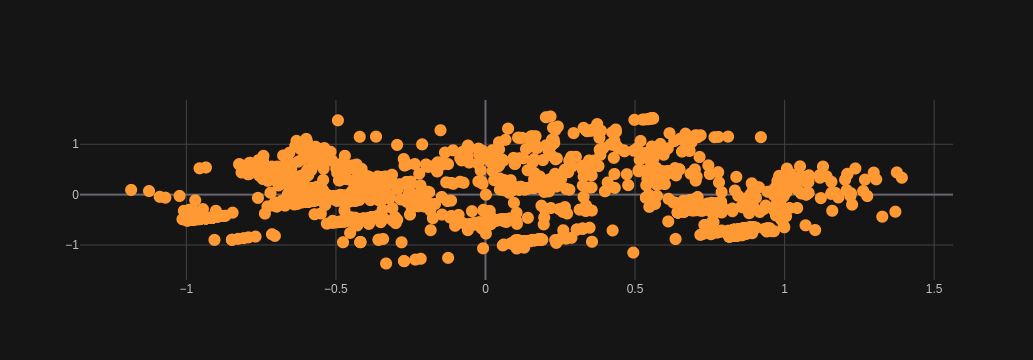

In [ ]:
Xp.reset_index().iplot(kind="scatter", x="p1", y="p2", mode="markers", text="title")

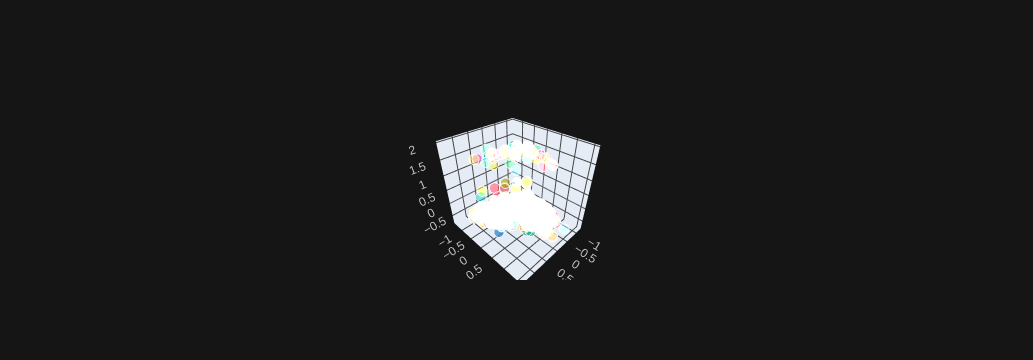

In [ ]:
Xp.reset_index().iplot(kind="scatter3d", x="p1", y="p2", z="p3", mode="markers", text="title")

In [ ]:
Xp

,,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1.262723,0.070363,0.306113,-0.651612,-0.481949,0.399666,1.268043,-0.006195,-0.242146,0.108428,...,-0.007634,0.003950,-0.048491,-0.020279,0.006848,0.045501,0.012162,-0.009509,0.010529,-0.033985
2,Jumanji (1995),0.648148,0.500719,0.308710,-0.769792,-0.283239,-0.088948,0.981802,0.240780,-0.195722,-0.061592,...,-0.006742,0.015763,0.024074,0.036020,0.022173,0.024043,0.019925,-0.024632,0.007661,-0.018861
3,Grumpier Old Men (1995),0.887596,-0.651382,-0.288788,0.239032,0.396267,-0.136995,-0.070178,0.001086,-0.010524,0.050599,...,-0.002519,-0.007706,-0.007575,-0.005795,0.002584,0.010098,-0.000925,-0.028066,0.006315,0.011629
5,Father of the Bride Part II (1995),0.791294,-0.236195,-0.037862,0.258833,-0.401359,0.038842,-0.202345,-0.203701,-0.068961,0.049749,...,-0.035967,-0.039591,-0.043333,-0.042393,0.016137,-0.062462,0.036222,-0.076582,-0.056083,0.071570
7,Sabrina (1995),0.879269,-0.661079,-0.276417,0.251807,0.385547,-0.172751,-0.071384,0.005454,-0.007737,-0.000264,...,-0.021770,-0.038855,-0.043731,-0.025028,0.035626,-0.054891,0.043364,-0.095819,-0.056416,0.072589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,Game Night (2018),0.702813,0.278576,0.043916,0.623530,-0.194503,0.466382,-0.600783,0.531678,-0.247549,0.124113,...,-0.036716,0.034434,0.032691,-0.016314,0.062835,0.030873,-0.005876,0.013190,-0.043643,0.009876
184471,Tomb Raider (2018),0.682385,0.871056,0.336840,-0.746858,0.188579,0.158139,0.171931,0.281229,-0.455763,-0.083565,...,-0.027659,0.002956,0.027458,0.006397,0.006823,0.005243,0.027846,-0.005631,0.005457,-0.016115
187593,Deadpool 2 (2018),0.997864,0.385060,0.108357,-0.064775,0.138457,0.372361,-0.789070,-0.382316,0.263800,0.416168,...,0.019841,-0.008250,-0.038536,0.000777,-0.005216,-0.001071,-0.003578,-0.024443,-0.002742,0.000986


### Selección de número óptimo de clusters

#### Generación de clusters

In [ ]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

In [ ]:
df_cl = pd.DataFrame(columns=["sse", "db", "sil"])
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(Xp)
    clusters = kmeans.labels_
    df_cl.loc[k, "sse"] = kmeans.inertia_ 
    df_cl.loc[k, "db"] = davies_bouldin_score(Xp,clusters)
    df_cl.loc[k, "sil"] = silhouette_score(Xp,clusters)

In [ ]:
df_cl

,sse,db,sil
2,3123.070784,2.451775,0.156527
3,2812.801223,2.000152,0.181253
4,2579.388974,1.873636,0.181779
5,2378.23519,1.818554,0.181396
6,2257.820614,1.776614,0.164351
7,2151.613573,1.774608,0.175556
8,2065.789321,1.725008,0.181083
9,1974.021851,1.653675,0.193225
10,1926.400399,1.710979,0.181796


#### Método del codo  (Inercia)

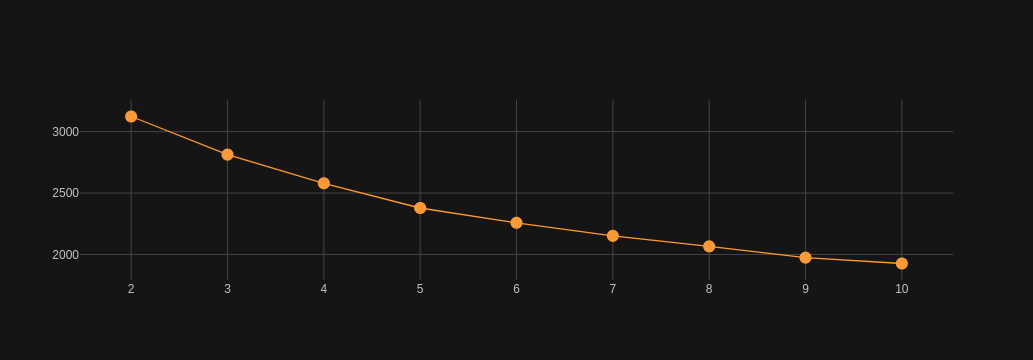

In [ ]:
df_cl[["sse"]].iplot(mode="markers+lines")




#### Davies-Bouldin

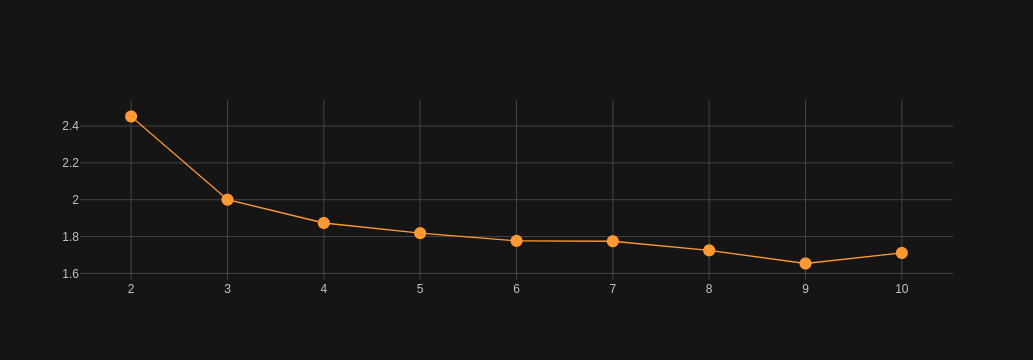

In [ ]:
df_cl[["db"]].iplot(mode="markers+lines")

#### Silhouette

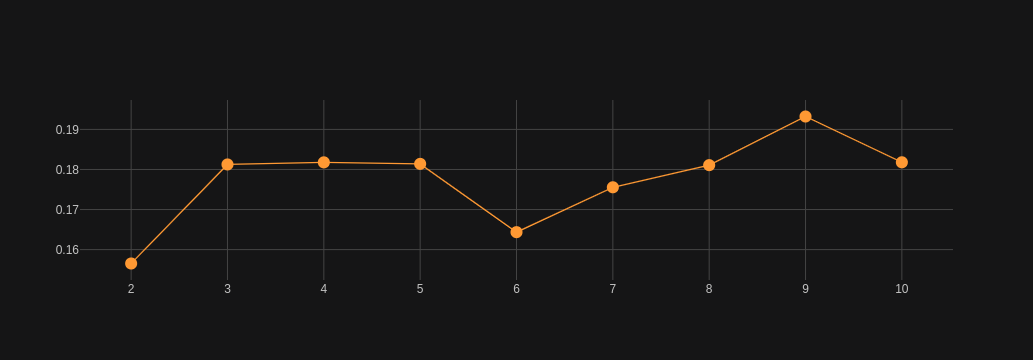

In [ ]:
df_cl[["sil"]].iplot(mode="markers+lines")

### K-Means

#### Entrenamiento de modelo

In [ ]:
cluster = KMeans(n_clusters=9, random_state=10)

In [ ]:
X["cl"] = Xs["cl"] = Xp["cl"] = cluster.fit_predict(Xp).astype(str)

#### Visualización

/home/oscar/VirtualEnvs/diplo/lib/python3.10/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/home/oscar/VirtualEnvs/diplo/lib/python3.10/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



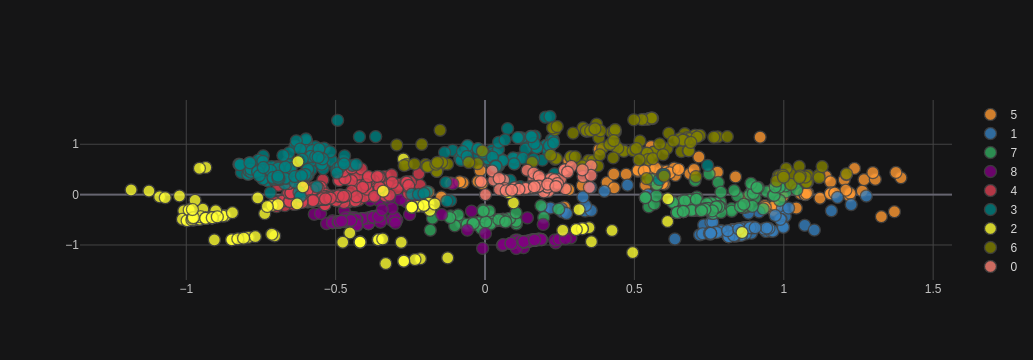

In [ ]:
Xp.reset_index().iplot(kind="scatter", x="p1", y="p2", categories="cl", mode="markers", text="title")

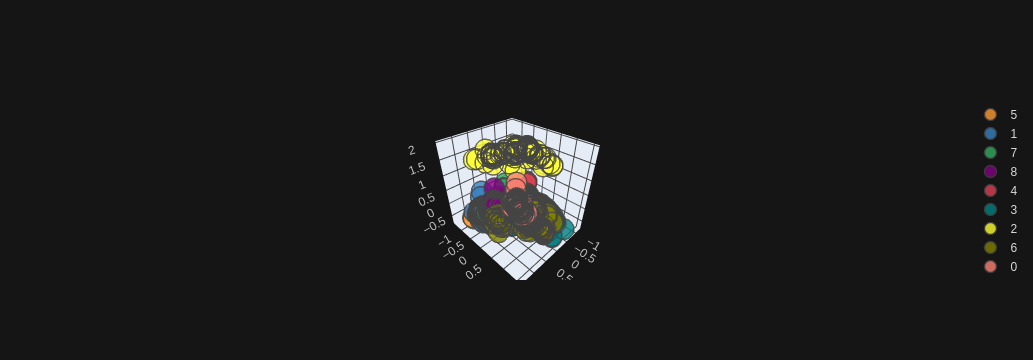

In [ ]:
Xp.reset_index().iplot(kind="scatter3d", x="p1", y="p2", z="p3", categories="cl", mode="markers", text="title")

#### Perfilamiento

In [ ]:
X.groupby("cl").mean().style.background_gradient(cmap='Blues')

,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,genre_genres,genre_horror,genre_imax,genre_listed,genre_musical,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max,tag_250,tag_action,tag_adolescence,tag_adultery,tag_adventure,tag_aliens,tag_and,tag_animation,tag_anime,tag_appealing,tag_atmospheric,tag_bad,tag_based,tag_beautiful,tag_best,tag_bittersweet,tag_black,tag_book,tag_boxing,tag_brothers,tag_business,tag_christmas,tag_cinematography,tag_classic,tag_comedy,tag_comic,tag_court,tag_crime,tag_dark,tag_death,tag_dialogue,tag_disney,tag_disturbing,tag_dreamlike,tag_emotional,tag_ending,tag_england,tag_family,tag_fi,tag_funny,tag_ghosts,tag_good,tag_great,tag_heist,tag_high,tag_holocaust,tag_humor,tag_illness,tag_imdb,tag_in,tag_india,tag_journalism,tag_killer,tag_king,tag_leonardo,tag_mafia,tag_men,tag_mental,tag_mindfuck,tag_movie,tag_music,tag_netflix,tag_new,tag_of,tag_on,tag_oscar,tag_philosophical,tag_plot,tag_politics,tag_provoking,tag_psychological,tag_psychology,tag_queue,tag_quirky,tag_religion,tag_remake,tag_robots,tag_romance,tag_satire,tag_school,tag_sci,tag_shakespeare,tag_soundtrack,tag_space,tag_stephen,tag_story,tag_superhero,tag_surreal,tag_suspense,tag_the,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
cl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.023256,0.046512,0.000000,0.000000,0.058140,0.558140,0.000000,0.011628,0.069767,0.011628,0.197674,0.011628,0.011628,0.058140,0.058140,0.011628,0.000000,0.069767,0.000000,0.034884,0.023256,3.670586,2.750000,4.302326,0.011628,0.000000,0.000000,0.000000,0.000000,0.023256,0.011628,0.011628,0.000000,0.011628,0.034884,0.000000,0.000000,0.023256,0.000000,0.000000,0.011628,0.000000,0.000000,0.023256,0.058140,0.000000,0.034884,0.000000,0.000000,0.000000,0.000000,0.023256,0.011628,0.000000,0.011628,0.000000,0.011628,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,0.023256,0.000000,0.034884,0.011628,0.000000,0.011628,0.023256,0.011628,0.011628,0.000000,0.034884,0.000000,0.000000,0.000000,0.000000,0.011628,0.023256,0.046512,0.000000,0.011628,0.023256,0.000000,0.000000,0.011628,0.000000,0.058140,0.011628,0.011628,0.023256,0.000000,0.011628,0.000000,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034884,0.000000,0.000000,0.023256,0.011628,0.023256,0.011628,0.000000,0.011628,0.000000,0.000000,0.011628,0.011628,0.011628,0.000000,0.000000
1,0.061947,0.070796,0.017699,0.035398,0.893805,0.053097,0.000000,0.000000,0.061947,0.000000,0.000000,0.008850,0.000000,0.000000,0.212389,0.035398,0.000000,1.000000,0.026549,0.017699,0.044248,0.026549,3.568080,1.933628,4.672566,0.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.123894,0.017699,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000,0.026549,0.000000,0.000000,0.000000,0.000000,0.008850,0.026549,0.017699,0.000000,0.008850,0.035398,0.000000,0.000000,0.008850,0.000000,0.000000,0.000000,0.008850,0.000000,0.000000,0.000000,0.008850,0.000000,0.000000,0.000000,0.035398,0.000000,0.000000,0.000000,0.008850,0.026549,0.000000,0.008850,0.008850,0.000000,0.017699,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000,0.026549,0.008850,0.000000,0.026549,0.000000,0.000000,0.053097,0.008850,0.000000,0.017699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.000000,0.017699,0.000000,0.008850,0.000000,0.026549,0.000000,0.017699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.008850,0.000000
2,0.050847,0.084746,0.033898,0.008475,0.254237,0.101695,0.127119,0.720339,0.042373,0.025424,0.000000,0.025424,0.008475,0.000000,0.042373,0.059322,0.00

In [ ]:
kmeans.cluster_centers_

array([[ 8.05874820e-01, -3.57708298e-01, -7.68520472e-02,
         2.45939908e-01, -9.21639113e-02, -1.85403112e-03,
        -1.17624905e-01,  3.66838954e-03,  1.22586199e-03,
        -1.60849305e-02, -1.53012346e-02,  3.59175283e-03,
        -2.45406702e-02, -2.29035250e-03,  7.23512505e-03,
         1.84533055e-02, -1.57705586e-02, -4.23108969e-02,
         5.60037955e-02,  1.61000021e-03, -5.85917298e-03,
         7.36912215e-03,  2.17029948e-02, -6.17138601e-03,
         3.30314954e-03, -2.99430377e-03, -8.96721239e-03,
        -8.52367283e-03, -9.16214340e-03, -2.93984709e-04,
        -4.51315651e-03,  1.05115329e-03, -4.01679710e-03,
         1.66217476e-03, -6.14653146e-03,  3.97060115e-03,
        -3.89315339e-03,  1.45004959e-03],
       [-5.16437528e-01, -3.62313685e-02, -1.22325178e-01,
        -3.26942124e-01, -2.46837918e-01, -5.46185231e-02,
        -9.73263485e-02, -2.33718803e-02, -1.14915714e-02,
         3.30527161e-03, -2.21718412e-02,  5.29106770e-02,
        -1.39